In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import cv2

In [15]:
points = [
    [0,0],[0.5,0.5],[1,1]
]
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'g']

In [45]:
# draw a rect using m and b in matplotlib
def draw_rect(m, b, color='r'):
    x = np.arange(-5,5)
    y = -m * x + b
    plt.plot(x, y, color)
    
def get_intersection(m1, b1, m2, b2):
    if m1 == m2:
        return None
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return x, y

def draw_set_of_rects(points):
    for i, p in enumerate(points):
        colors[i]
        draw_rect(p[0], p[1], colors[i])

def get_intersections(points):
    intersections = []
    visited = []
    total = len(points)**2
    i = 0
    for p in points:
        for q in points:
            i +=1
            if p != q and (p,q) not in visited and (q,p) not in visited:
                visited.append((p,q))
                point = get_intersection(-p[0], p[1], -q[0], q[1])
                if point is None:
                    continue
                else:
                    intersections.append(point)
            if i%100 == 0:
                print(f'{i/total}')
    return intersections

def get_most_common_intersection(points,n=1):
    intersections = get_intersections(points)
    return Counter(intersections).most_common(n)[0][0]

def get_most_common_intersection_img(img,n=1):
    pts = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 0:
                pts.append([i,j])
    print(len(pts))
    return get_most_common_intersection(pts,n)
                
            

In [46]:
get_most_common_intersection(points,3)

(1.0, 0.0)

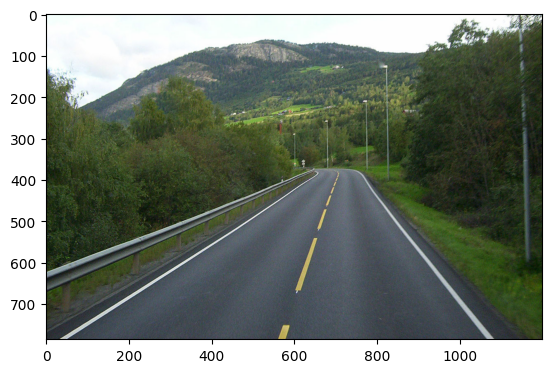

In [47]:
img = cv2.imread('road.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

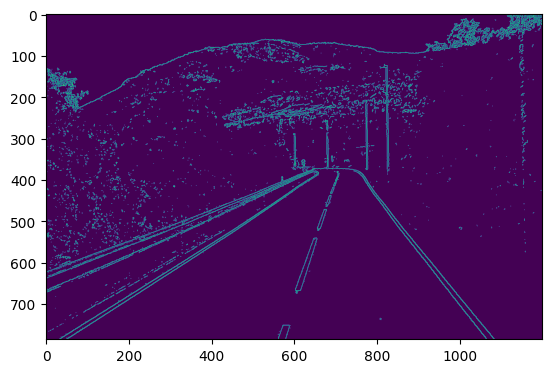

In [48]:
processed = cv2.Canny(img, 190, 200,None,3)
plt.imshow(processed)

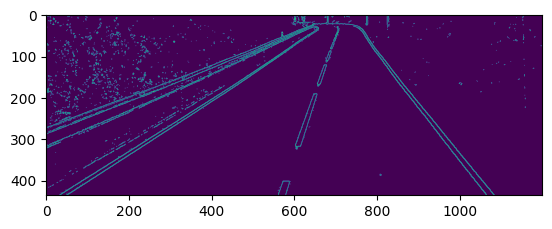

In [49]:
focused = processed[350:, 0:]
plt.imshow(focused)